<a href="https://colab.research.google.com/github/shwe-hg/capston-project-on-classification/blob/main/project_on_classification(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CROSS SELL PREDICTION**

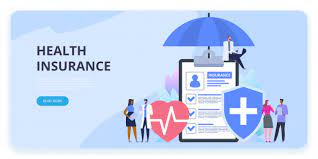

## **Problem Statement** :

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



### **Dataset Description** :



1.**id** : Unique ID for the customer

2.**Gender**: Gender of the customer

3.**Age** : Age of the customer

4.**Driving_License** : 0=Customer does not have DL, 1= Customer already has DL

5.**Region_Code** : Unique code for the region of the customer

6.**Previously_Insured :** 1= Customer already has Vehicle Insurance, 0= Customer doesn't have Vehicle Insurance

7.**Vehicle_Age** : Age of the Vehicle

8.**Vehicle_Damage** : 1= Customer got his/her vehicle damaged in the past. 0= Customer didn't get his/her vehicle damaged in the past.

9.**Annual_Premium**: The amount customer needs to pay as premium in the year

10.**PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11.**Vintage** : Number of Days, Customer has been associated with the company

12.**Response** : 1 : Customer is interested, 0 : Customer is not interested

Total no' of rows are 381109 .
Total no' of colums are 12 .

### **Introduction** :

###**Importing Libraries** :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Reading Dataset** :

In [3]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')


###**Data Wrangling**: 

**Data wrangling is data cleaning or preprocessing, which refers to cleaning, transforming, and preparing raw data to make it suitable for analysis.**

let's have a look at dataset :


In [4]:
#first 5 rows of dataset .
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
#last 5 rows of dataset 
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# describe will give the summary statistics for numerical columns in a DataFrame
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
# the information of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
#info about columns 
df.columns 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
# shape of dataset
df.shape

(381109, 12)

In [10]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### **Checking the duplicate values** :

In [12]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 12)


**We found that there is no duplicate values in the above dataset .**

####**Missing values / Null values** :

In [13]:
df1.isnull()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**We found that there is no null values in the dataset .**

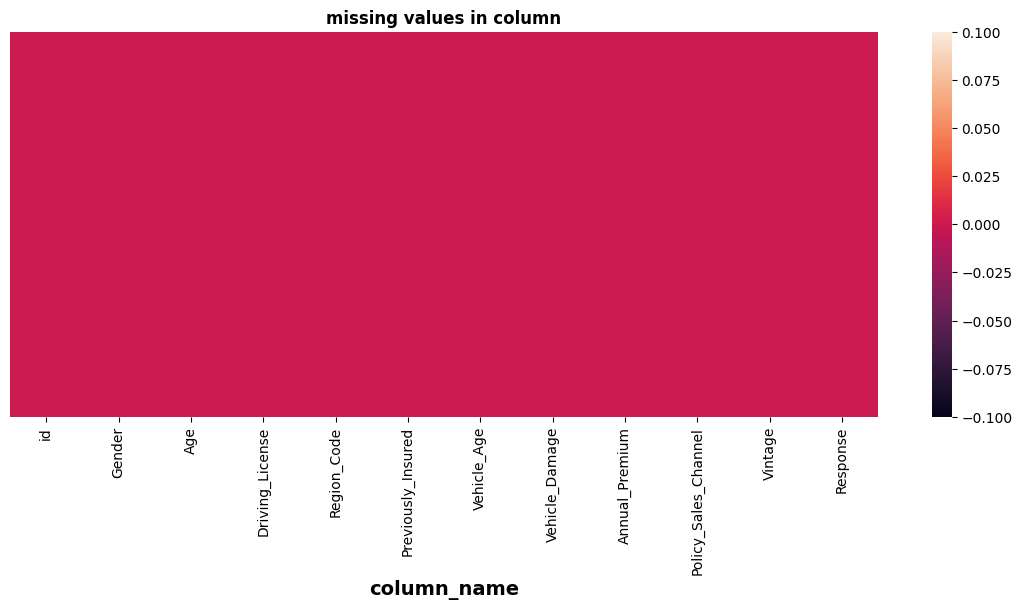

In [15]:
# heatmap for missing values .
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=12)
plt.show()


**The above heatmap is for missing values present in dataset .**

####**Getting the data type of dataset .**

In [16]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [17]:
# statistical info
df1.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


**describe() will give the statistical information of dataset.**

##**Data visualizations**

##**Age**

<Axes: >

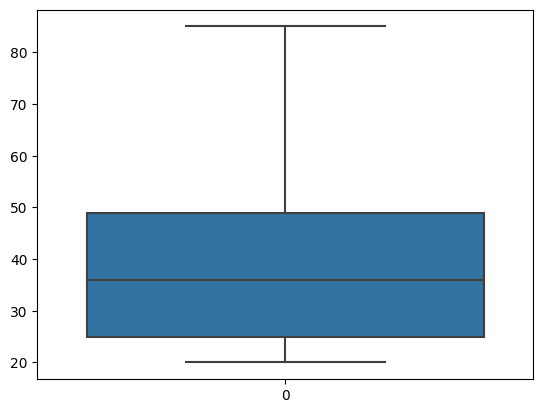

In [18]:
sns.boxplot(df1['Age'])

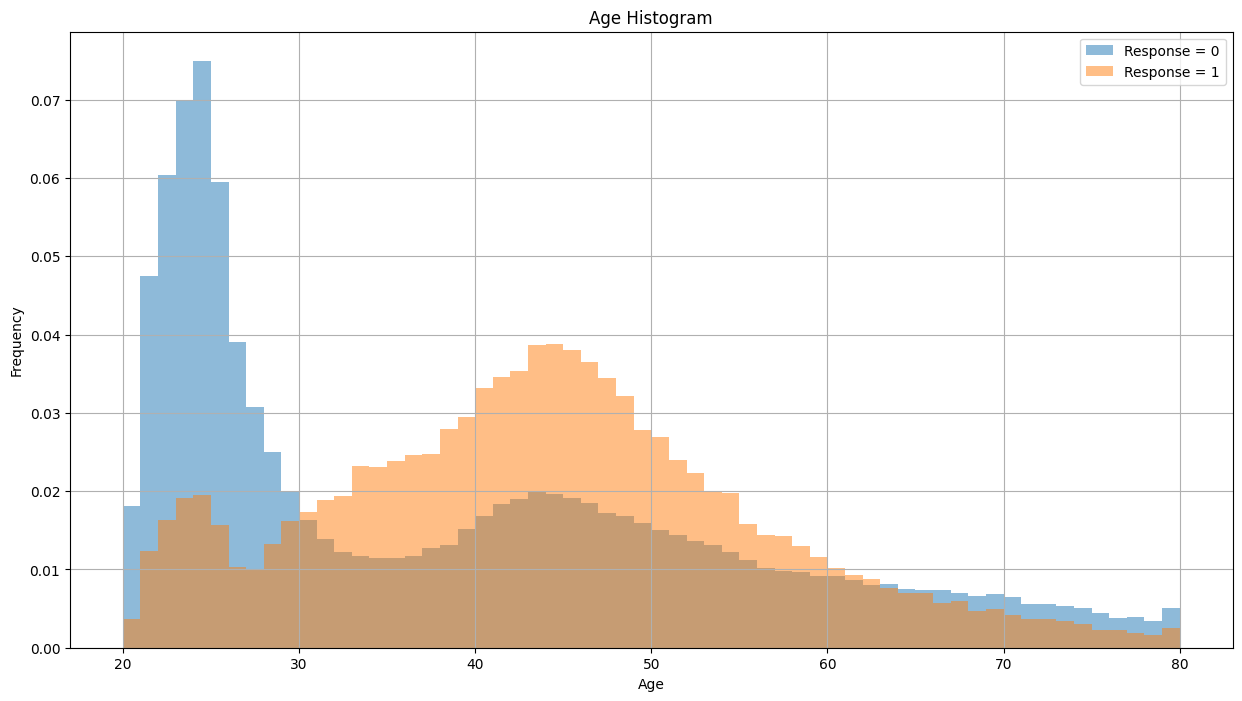

In [19]:
plt.figure(figsize = (14,6))
df1.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

<Axes: >

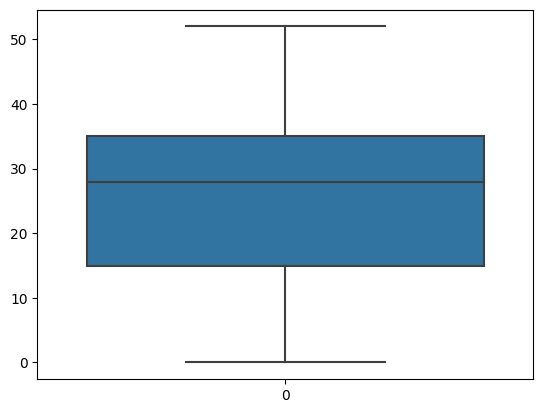

In [20]:
sns.boxplot(df1['Region_Code'])

**Target variable**.

<Axes: ylabel='count'>

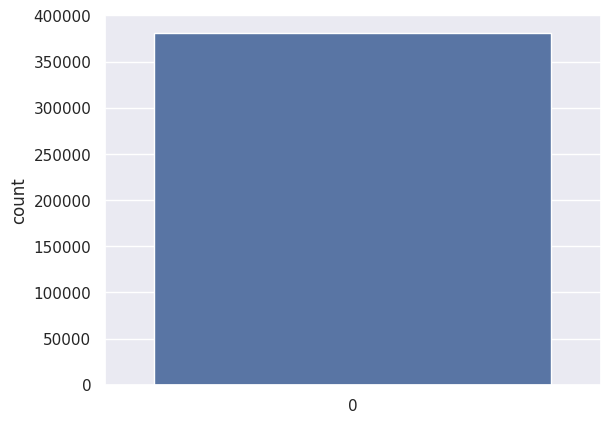

In [21]:
sns.set_theme(style="darkgrid")
sns.countplot(df1['Response'])

##**Finding Outliers**

<ipython-input-22-819f09daf6a4>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1][0],x = df1['Annual_Premium'])
<ipython-input-22-819f09daf6a4>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1][1],x = df1['Age'])
<ipython-input-22-819f09daf6a4>:31: UserWarning: 

`distp

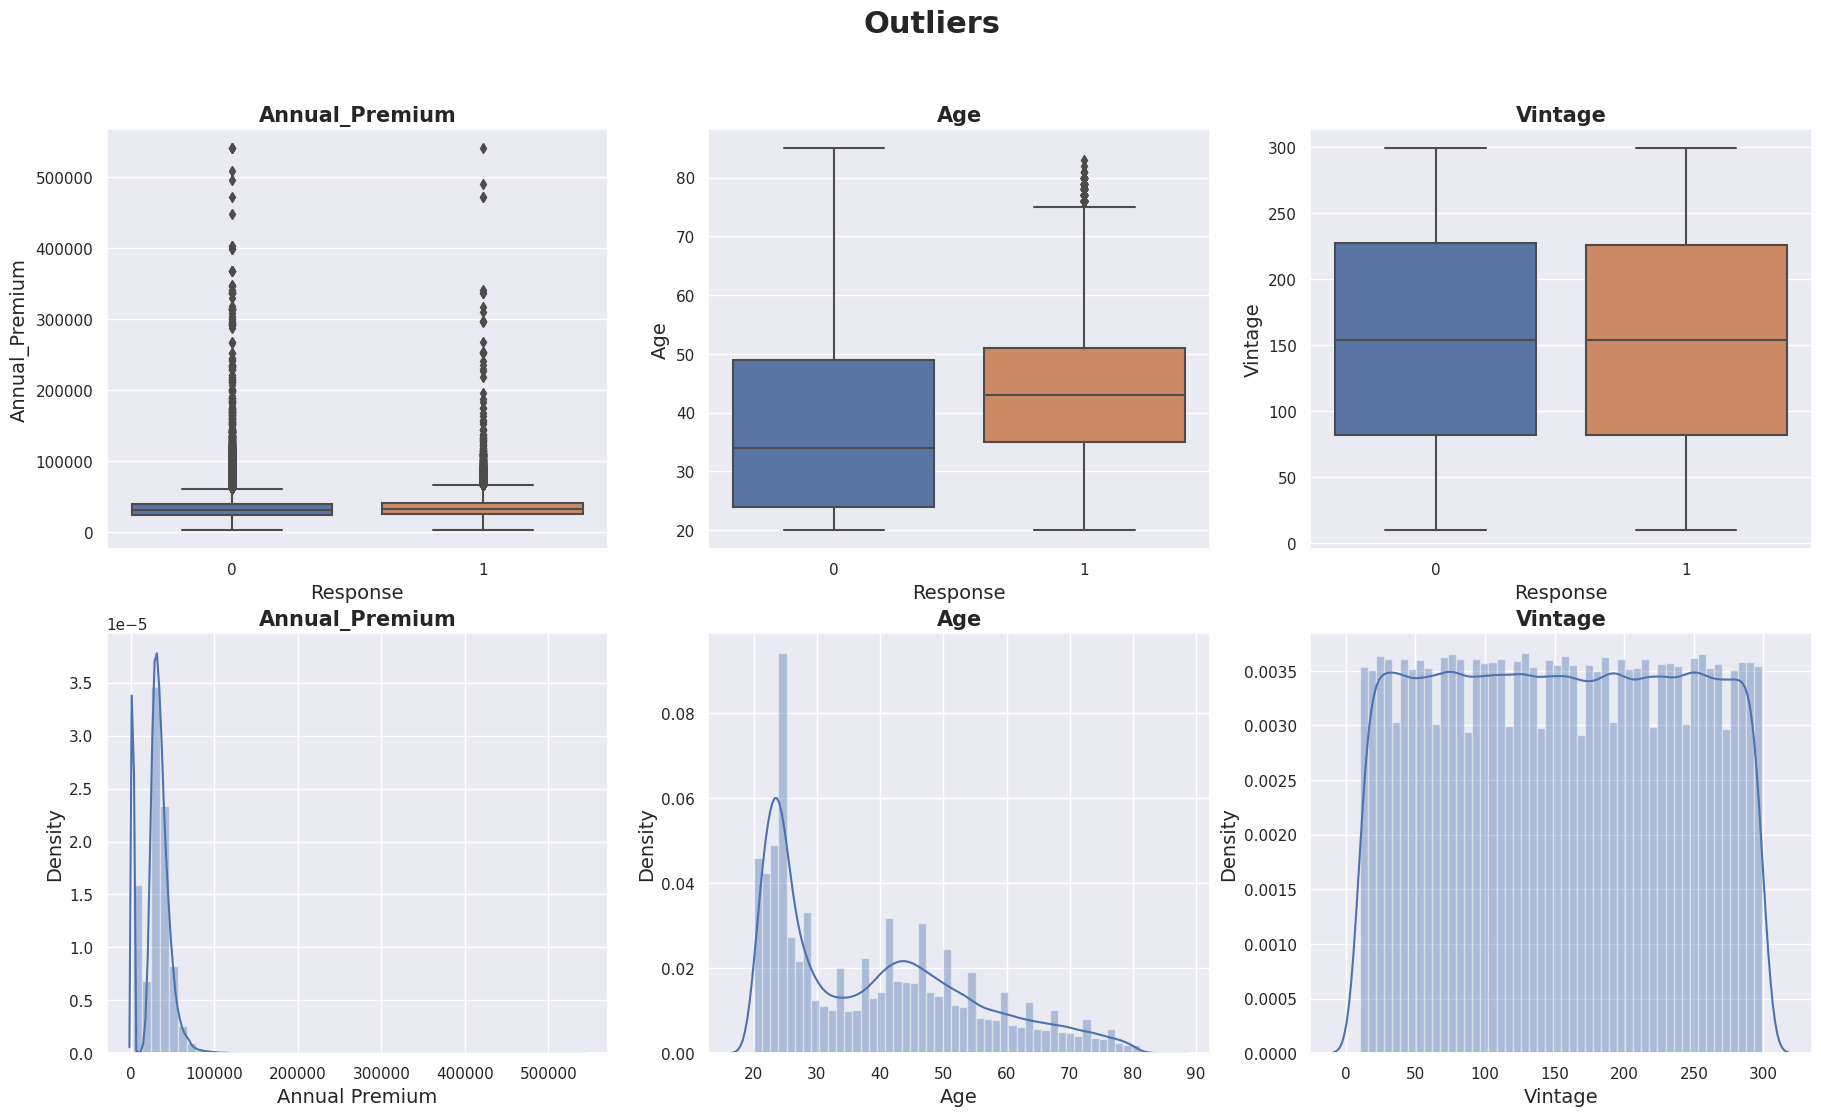

In [22]:
def show_outliers(df1):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df1)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df1)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df1)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df1['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df1['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df1['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(df1)

###**Conclusion**




**1.From above graph we can say that '[Age]' is having some of outliers, but that won't be affectingt our result so we will ignore it** .

**2.From above graph '[Vintage]' is having uniform distribution**.

**3.From the above plot it can be implied that '[Annual Premium]' has a poitively skewed distribution.**


##**Response**

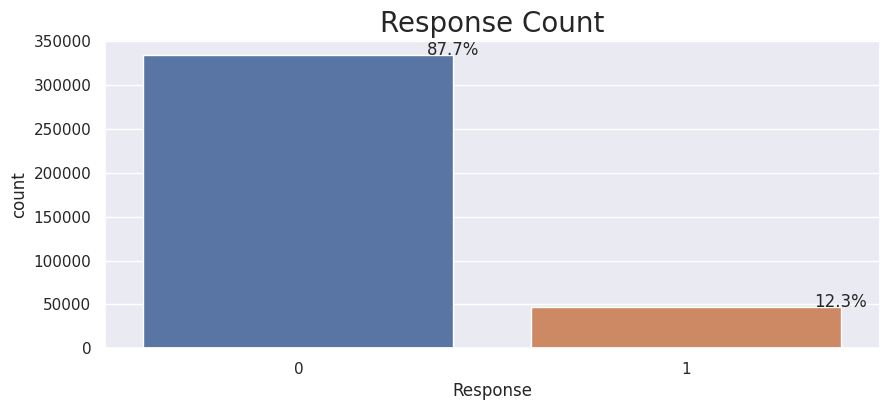

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,4))
total = float(len(df1))
ax = sns.countplot(x='Response', data=df1)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

###**conclusion**



**As it seems majority of people are not interested i.e 87.7% and interested ratio is just 12.3% .**

##**Gender variable**


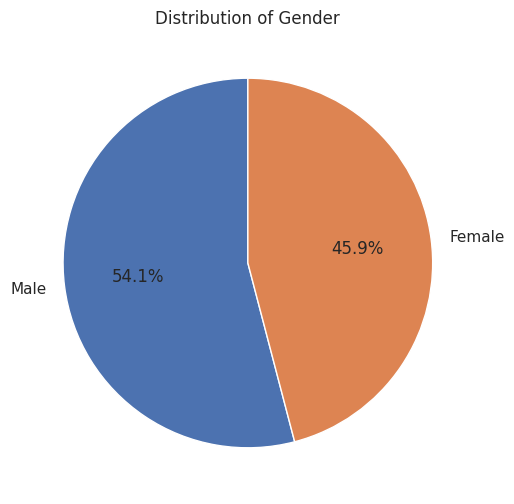

In [24]:
plt.figure(figsize=(8, 6))

# Calculate the count of each gender category
gender_counts = df1['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add title and legend
plt.title('Distribution of Gender')

# Show the plot
plt.show()


###**conclusion**


**From the pie chart we can conclude that male ratio is slightly higher than the female.**

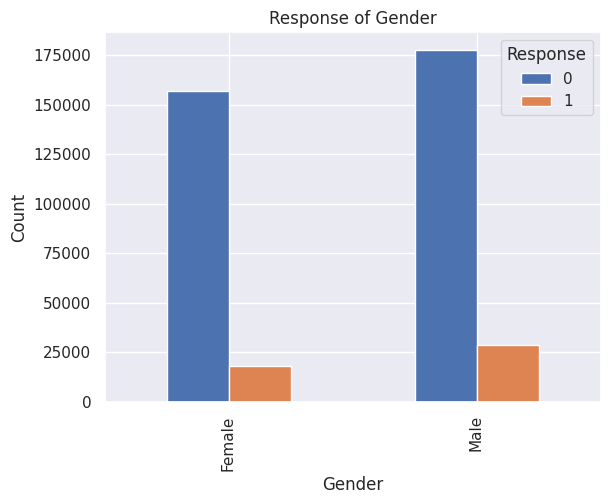

In [25]:
import matplotlib.pyplot as plt

# Calculate the count of each gender and response category
gender_response_counts = df1.groupby(['Gender', 'Response']).size().unstack()

# Plot the grouped bar plot
gender_response_counts.plot(kind='bar')

# Customize the plot
plt.title('Response of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


###**conclusion**




**we can say the ratio of people which are not interested is much higher than the people who are interested.**

**As we can clearly see from the graph male ratio is high as compared to female.**

##**Driving License**



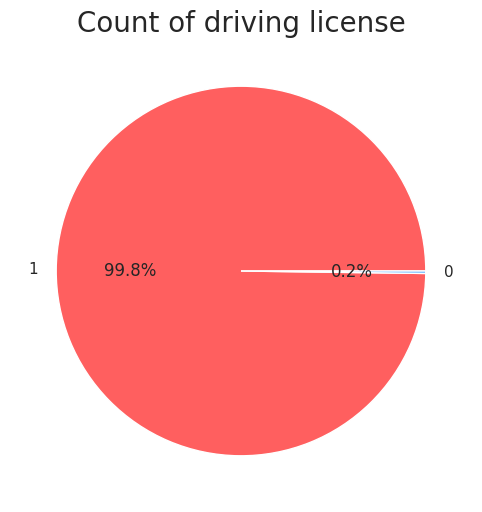

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Plot the pie chart
df1['Driving_License'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of driving license', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


###**conclusion**


**From pie chart we can clearly say that 99.8% i.e majority of people have DL and very less people are not having DL**.




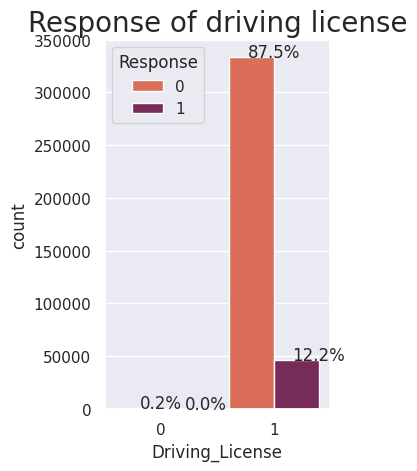

In [27]:
plt.subplot(1,2,2)
total = float(len(df1))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="rocket_r", data=df)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

###**conclusion**


**Only a small percentage of people who have a DL (12.2%) are interested in buying insurance**.


##**Vehicle Age**

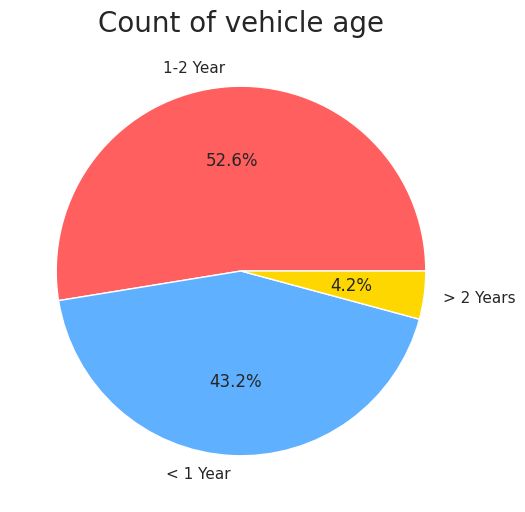

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
vehicle_age_counts = df1['Vehicle_Age'].value_counts()

# Plot the pie chart
vehicle_age_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF', '#FFD700'])

# Customize the plot
plt.title('Count of vehicle age', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


###**conclusion**


**

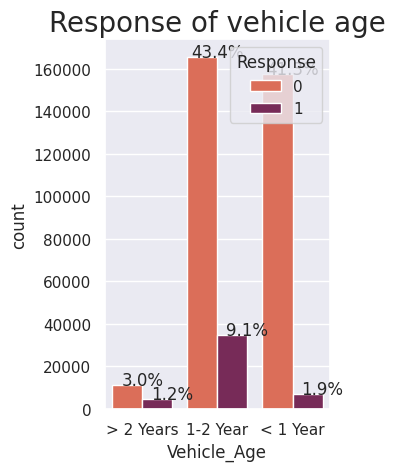

In [29]:
plt.subplot(1,2,2)
total = float(len(df1))
ax2 = sns.countplot(x='Vehicle_Age',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle age',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()


##**Annual Premium**

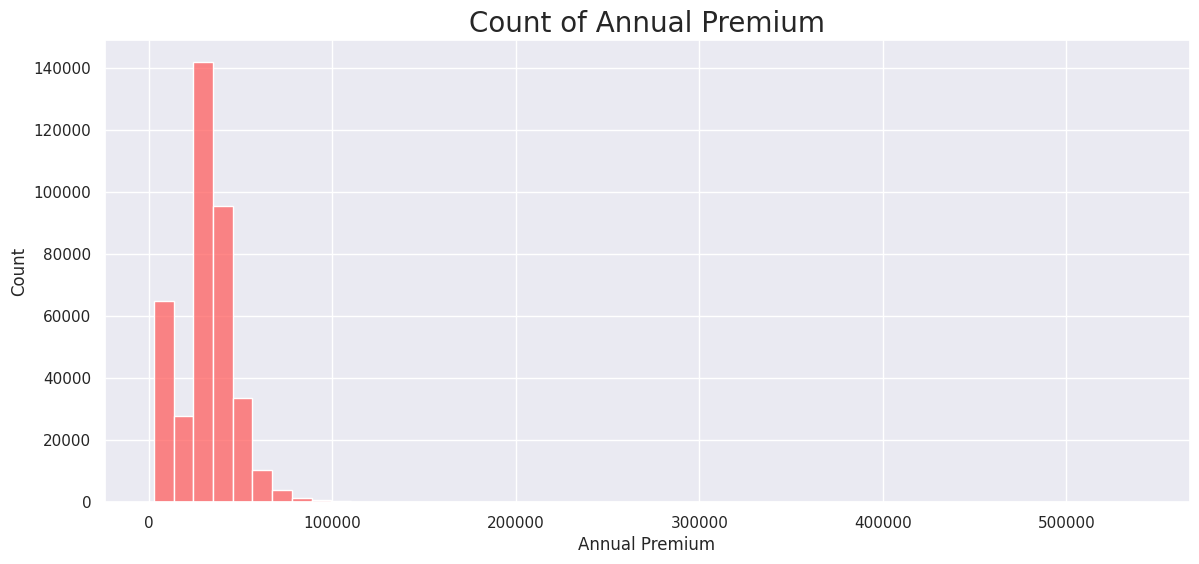

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")

# Plot the histogram with a different color
sns.histplot(data=df, x='Annual_Premium', bins=50, color='#FF5F5F')

# Customize the plot
plt.title('Count of Annual Premium', fontsize=20)
plt.xlabel('Annual Premium')
plt.ylabel('Count')

# Show the plot
plt.show()


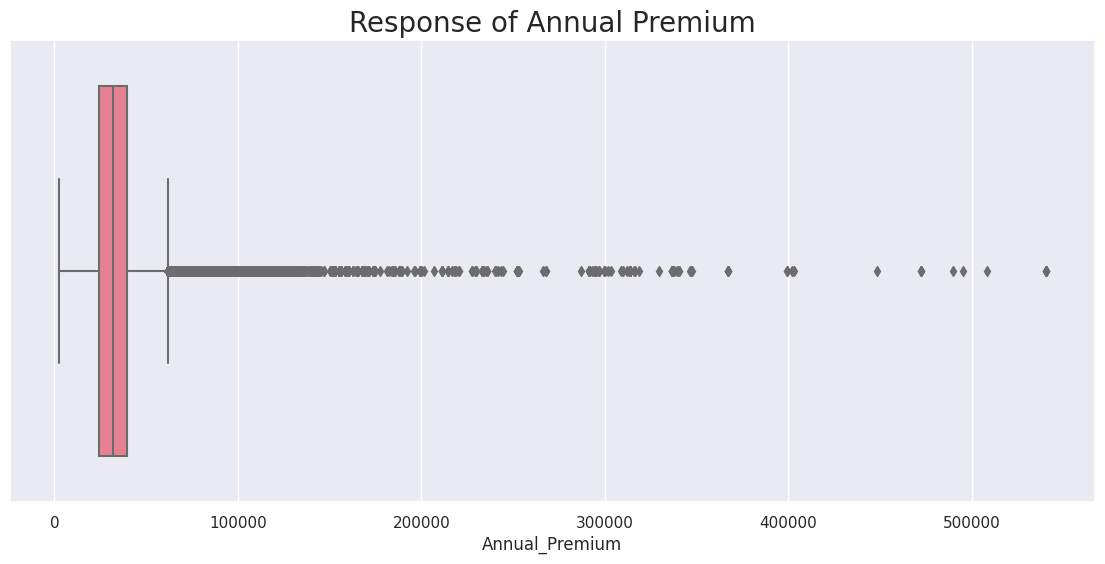

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")

# Create the box plot with a different color palette
sns.boxplot(x='Annual_Premium', palette="husl", data=df1)

# Customize the plot
plt.title('Response of Annual Premium', fontsize=20)

# Show the plot
plt.show()


##**Previously Insured**

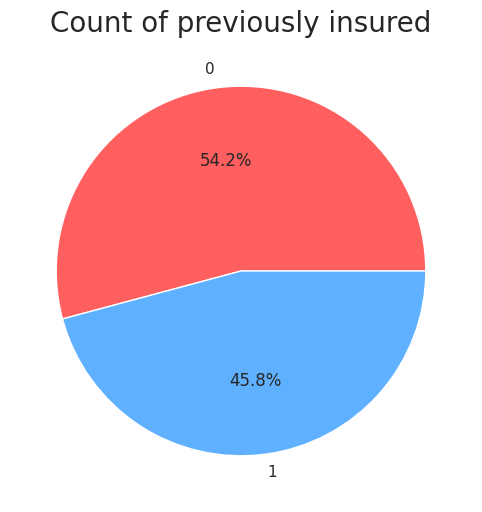

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
previously_insured_counts = df1['Previously_Insured'].value_counts()

# Plot the pie chart
plt.pie(previously_insured_counts, labels=previously_insured_counts.index, autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of previously insured', fontsize=20)

# Show the plot
plt.show()


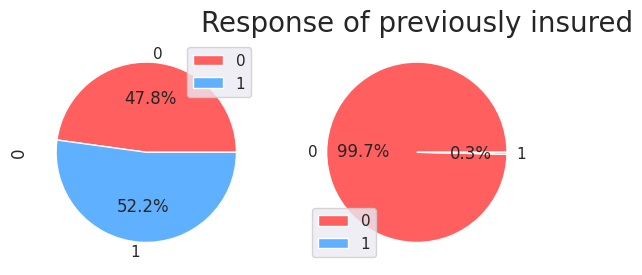

In [33]:
import matplotlib.pyplot as plt

# Calculate the count of each category and response combination
previously_insured_response_counts = df['Response'].groupby(df['Previously_Insured']).value_counts().unstack()

# Plot the pie chart
previously_insured_response_counts.plot.pie(subplots=True, autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Response of previously insured', fontsize=20)
plt.ylabel('')  # Remove the ylabel

# Show the plot
plt.show()


##**Vehicle Damage**

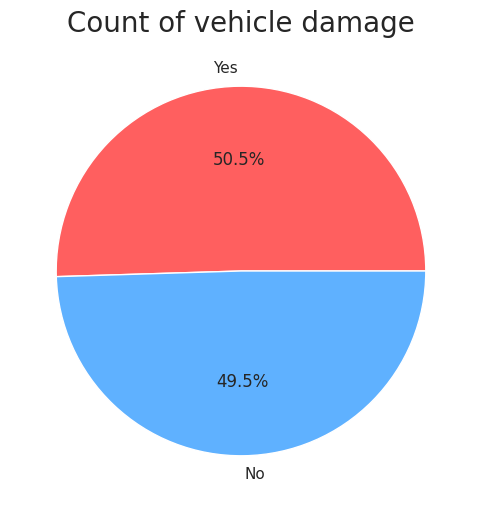

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
vehicle_damage_counts = df1['Vehicle_Damage'].value_counts()

# Plot the pie chart
vehicle_damage_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of vehicle damage', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


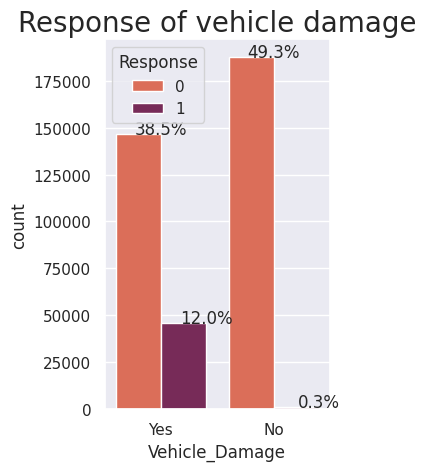

In [35]:
plt.subplot(1,2,2)

total = float(len(df1))
ax2 = sns.countplot(x='Vehicle_Damage',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle damage',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

##**Vintage**

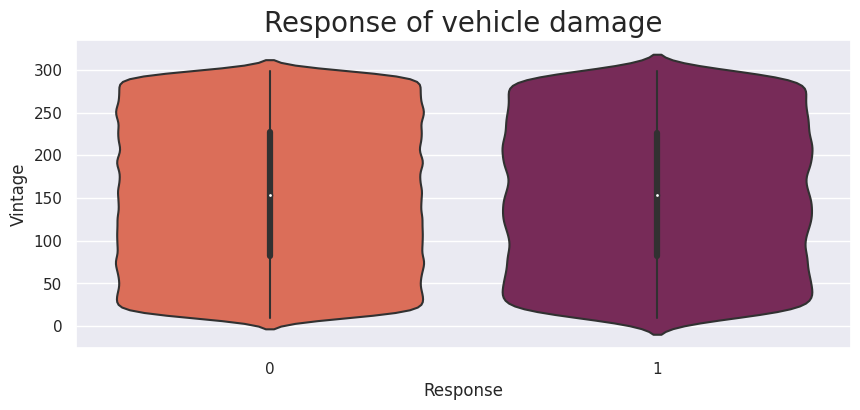

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.set(style="darkgrid")

# Create the violin plot
sns.violinplot(x='Response', y='Vintage', palette='rocket_r', data=df1)

# Customize the plot
plt.title('Response of vehicle damage', fontsize=20)

# Show the plot
plt.show()


##**Correlation Matrix**

<ipython-input-37-06dec8f27a3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True)


<Axes: >

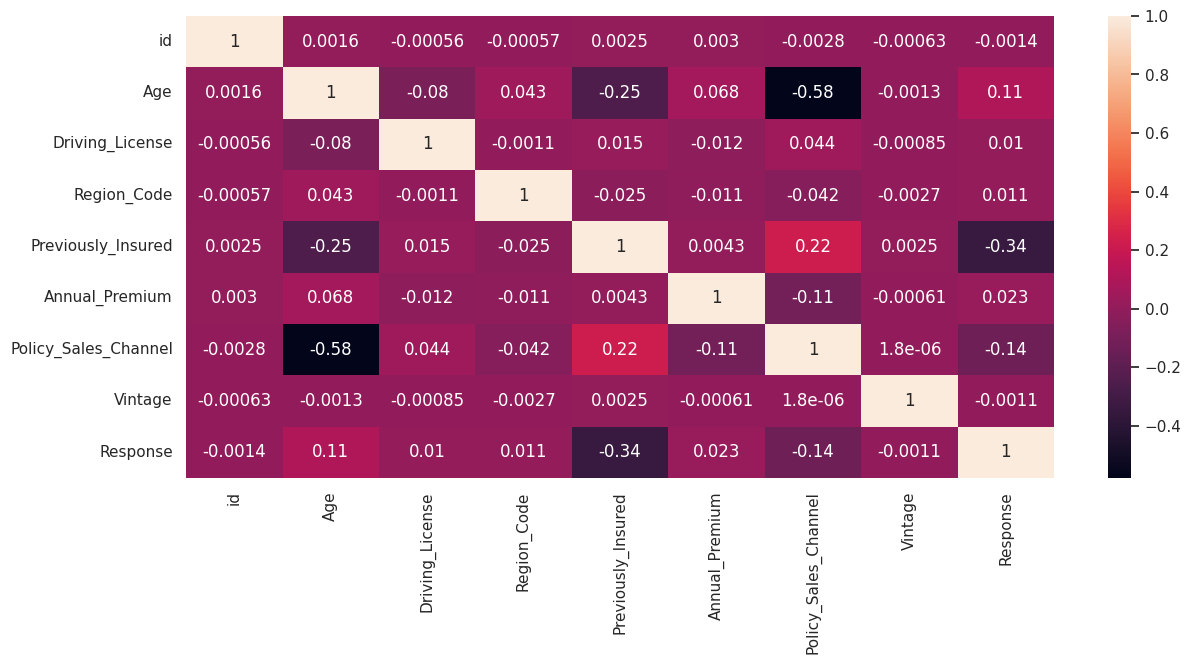

In [37]:
plt.figure(figsize = (14,6))
sns.heatmap(df1.corr(), annot = True)

In [41]:
# Finding Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [42]:
cal_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])


,variables,VIF
0,id,3.976952
1,Age,10.457630
2,Driving_License,37.690580
3,Region_Code,4.954198
4,Previously_Insured,1.986389
5,Annual_Premium,4.174946
6,Policy_Sales_Channel,7.750265
7,Vintage,4.373295
